In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

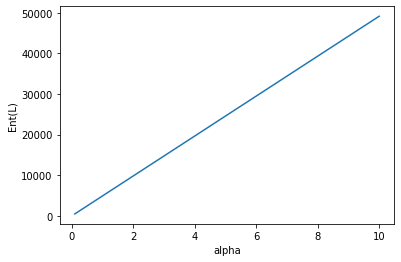

In [3]:
N = 100
p = 0.991
mu = -50*0.991+1000*0.009
var = (-50-mu)**2 * p + (1000 - mu)**2 * (1-p)
alpha = [(i+1)/N*10 for i in range(N)]
Ent = [mu+a*var/2 for a in alpha]

plt.plot(alpha,Ent)
plt.ylabel('Ent(L)')
plt.xlabel('alpha')
plt.show()

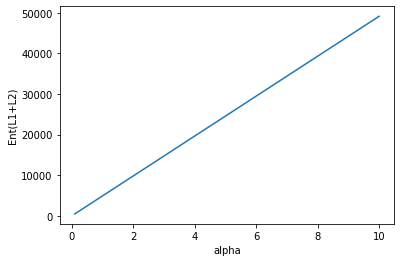

In [4]:
mu12 = -100 * (p**2) + 950 * 2*p*(1-p) + 2000 * (1-p)**2
var12 =  (-100 - mu12)**2 * (p**2) + (950 - mu12)**2 * 2*p*(1-p) + (2000 - mu12)**2 * (1-p)**2
Ent_b = [mu12+a*var12/2 for a in alpha]

plt.plot(alpha,Ent)
plt.ylabel('Ent(L1+L2)')
plt.xlabel('alpha')
plt.show()

D:\APPLICATIONS\Anaconda\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt
D:\APPLICATIONS\Anaconda\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


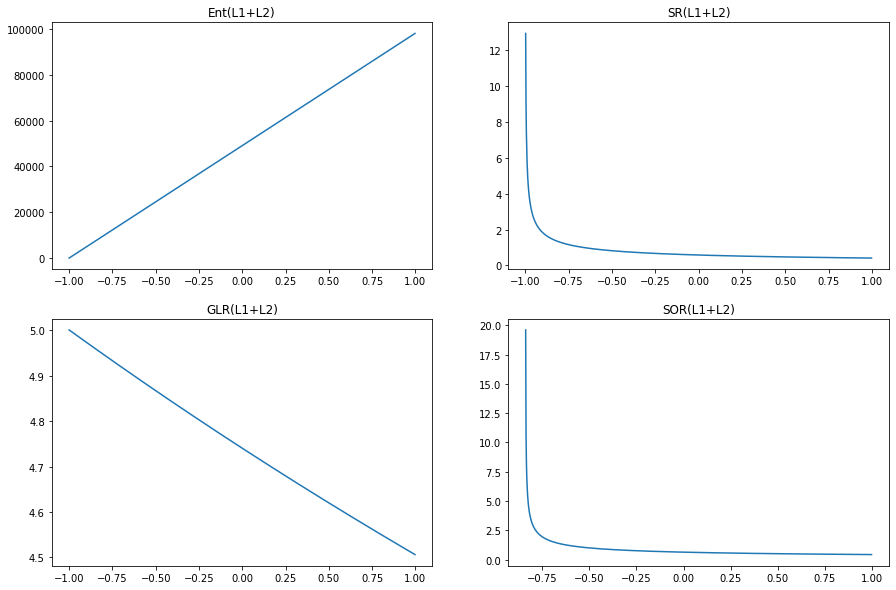

In [6]:
# here a is the probability of (-50,-50), and thus correspondingly we know
#P(-50,1000) = 1-p-a, P(1000,-50) = 1-p-a, P(1000,1000) = a+2p-1
p = 0.991
mu = -50*p+1000*(1-p)
var = (-50-mu)**2 * p + (1000-mu)**2 * (1-p)
N = 1000
alpha = 5

def compute_a(rho):
    RHS = mu**2 + rho*var
    RHS = RHS - (10**6 - (10**5 + 2 * 10**6)*p)
    a = RHS / (2500+10**5+10**6)
    
    return a

rho = [-1+2*i/N for i in range(N)]

Ent_c = []
SR_c = []
GLR_c = []
SOR_c = []
for r in rho:
    p1 = compute_a(r)
    p2 = 2*p - 2*p1
    p3 = 1 - 2*p + p1
#     print(p1,p2,p3,p1+p2+p3)
    mu_12 = -100*p1 + 950*p2 + 2000*p3
    var_12 = (-100 - mu_12)**2 * p1 + (950 - mu_12)**2 * p2 + (2000 - mu_12)**2 * p3
    mu_plus = 950*p2 + 2000*p3
    mu_plus_square = 950**2 * p2 + 2000**2 * p3
    Ent_c.append(mu_12+alpha*var_12/2)
    SR_c.append(- mu_12 / np.sqrt(var_12))
    GLR_c.append(- mu_12 / mu_plus)
    SOR_c.append(- mu_12 / np.sqrt(mu_plus_square))

plt.figure(figsize = (15,10))
ax1 = plt.subplot(2,2,1)
plt.title('Ent(L1+L2)')
ax2 = plt.subplot(2,2,2)
plt.title('SR(L1+L2)')
ax3 = plt.subplot(2,2,3)
plt.title('GLR(L1+L2)')
ax4 = plt.subplot(2,2,4)
plt.title('SOR(L1+L2)')

plt.sca(ax1)
plt.plot(rho,Ent_c)
plt.sca(ax2)
plt.plot(rho,SR_c)
plt.sca(ax3)
plt.plot(rho,GLR_c)
plt.sca(ax4)
plt.plot(rho,SOR_c)

plt.show()

In [57]:
# 1/np.sqrt(2*math.pi) - 1
# 1/2 - 1/(2*math.pi)
sp = -(1/np.sqrt(2*math.pi) - 1) / np.sqrt(1/2 - 1/(2*math.pi))
print(sp)

1.029526854328182


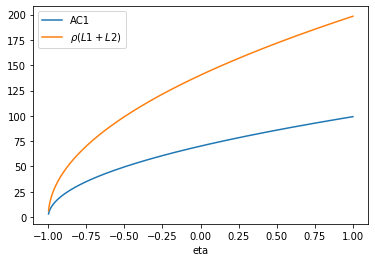

In [84]:
# problem 4
p = 0.991
mu = -50*p+1000*(1-p)
N = 1000
var = (-50-mu)**2 * p + (1000-mu)**2 * (1-p)

eta = [-1+2*(i+1)/N for i in range(N)]

AC1 = []
AC2 = []
y = []
for r in eta:
    AC1.append((var * (1+r)) / np.sqrt(2*var + 2*r*var))
    AC2.append(AC1[-1])
    y.append(np.sqrt(2*var + 2*r*var))

plt.plot(eta,AC1,label = 'AC1')
plt.plot(eta,y,label = r'$\rho (L1+L2)$')
# plt.ylim(0.2, 0.6)
plt.xlabel('eta')
plt.legend(loc = 'best')
plt.show()

# plt.plot(eta,y,label = r'AC_1 / $\rho (L1+L2)$')
# plt.ylim(0.2, 0.6)
# plt.xlabel('eta')
# plt.legend(loc = 'best')
# plt.show()